Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-

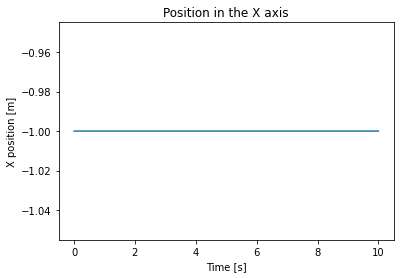

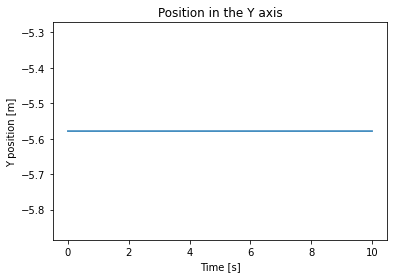

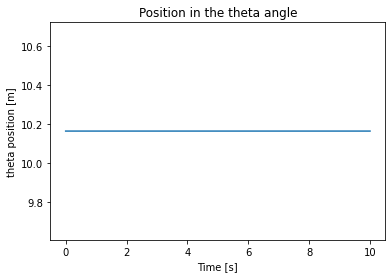

In [31]:
# Install the PyBullet module.
!pip install pybullet

import numpy as np
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data

from time import sleep # Sin usar 

# Datos del problema fisico
d_pendulo = 0.5
alfa = 0.5
gamma = 1.5
theta_0 = np.deg2rad(10)
g = -9.81

# Nos conectamos en modo DIRECT para realizar los cálculos independientemente 
# de la renderización de imágenes 3D
p.connect(p.DIRECT)


# Accedemos a Bullet data files.
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.loadURDF("plane.urdf")

p.resetSimulation()

# Establecemos la gravedad de la simulación
p.setGravity( 0, g, 0 )
p.setRealTimeSimulation(0)
p.setTimeStep(1./240.) # ESPECIFICAR POR QUÉ SE DECIDIÓ POR ESTE COMANDO

# Creamos el punto pivote
# Pivot_shape = p.createCollisionShape(p.GEOM_SPHERE, radius=0.2 ) 
Pivot_shape = p.createCollisionShape( shapeType=p.GEOM_BOX, halfExtents=[0.6, 1.0, 0.04] )
PivotId = p.createMultiBody( baseMass = 0, 
                             baseCollisionShapeIndex = Pivot_shape, 
                             basePosition = [0,0,0]) 

# Creamos el objeto físico con movimiento 
ball_shape = p.createCollisionShape(p.GEOM_SPHERE, radius=0.01) # CAMBIAR RADIO
SphereId   = p.createMultiBody( baseMass = 1, 
                                baseCollisionShapeIndex = ball_shape, 
                                basePosition = [-1,-1,0] ) 

# Creamos una restriccion entre Pivot y Sphere
p.createConstraint( PivotId, 
                    -1, 
                    SphereId, 
                    -1, 
                    p.JOINT_POINT2POINT,
                    jointAxis= [0, 0, 0],
                    parentFramePosition=[0, 0, 0],
                    childFramePosition=[-1, -1, 0] )

# Creamos las listas o contadores para las dimensiones  x,y,z y t
t = 0 # [s] - Tiempo inicial
X_vec = []
Y_vec = []
Z_vec = []
t_vec = []
theta_vec = []

# Creamos la simulación a través de un bucle while 
while t < 10:
    spherePos, sphereOrn = p.getBasePositionAndOrientation(SphereId)
    t_vec.append(t)     
    X_vec.append(spherePos[0])
    Y_vec.append(spherePos[1])
    Z_vec.append(spherePos[2])

    theta_vec.append(np.rad2deg( np.arctan( spherePos[0]/spherePos[1] ) ) )


    t += 1./240.  # Actualización de la variable tiempo
    p.stepSimulation() 




# Convertimos las listas de los valores de posición den cada dimensión en un arreglo de matrices en cada una de ellas 
X_vec = np.array(X_vec)
Y_vec = np.array(Y_vec)
Z_vec = np.array(Z_vec)
t_vec = np.array(t_vec)

# Gráfico de la posición de la bola en X,Y,Z
plt.plot(t_vec, X_vec)
plt.xlabel("Time [s]")
plt.ylabel("X position [m]")
plt.title("Position in the X axis")
plt.show()

plt.plot(t_vec, Y_vec)
plt.xlabel("Time [s]")
plt.ylabel("Y position [m]")
plt.title("Position in the Y axis")
plt.show()

plt.plot(t_vec, theta_vec)
plt.xlabel("Time [s]")
plt.ylabel("theta position [m]")
plt.title("Position in the theta angle")
plt.show()






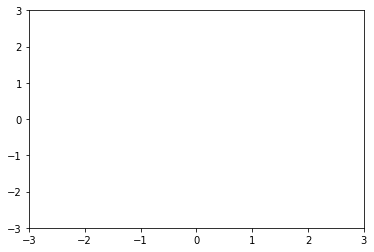

In [ ]:
# Realizamos una animación
%matplotlib inline
import numpy as np

from IPython.display import HTML
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-3, 3), ylim=(-3, 3))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(t_vec[i], Y_vec[i])
    return line,

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# Exportamos la animación al navegador
HTML(anim.to_html5_video())

(-1.0, -1.0, 0.0)
(-1.0, -1.0001703125, 0.0)
(-1.0, -1.0005109079543302, 0.0)
(-1.0, -1.001021754502542, 0.0)
(-1.0, -1.0017028179710967, 0.0)
(-1.0, -1.0025540618751785, 0.0)
(-1.0, -1.0035754474206326, 0.0)
(-1.0, -1.00476693350603, 0.0)
(-1.0, -1.0061284767248553, 0.0)
(-1.0, -1.00766003136782, 0.0)
(-1.0, -1.0093615494253, 0.0)
(-1.0, -1.0112329805898983, 0.0)
(-1.0, -1.0132742722591284, 0.0)
(-1.0, -1.0154853695382244, 0.0)
(-1.0, -1.0178662152430729, 0.0)
(-1.0, -1.020416749903267, 0.0)
(-1.0, -1.0231369117652842, 0.0)
(-1.0, -1.0260266367957858, 0.0)
(-1.0, -1.0290858586850369, 0.0)
(-1.0, -1.0323145088504502, 0.0)
(-1.0, -1.0357125164402483, 0.0)
(-1.0, -1.039279808337248, 0.0)
(-1.0, -1.0430163091627638, 0.0)
(-1.0, -1.0469219412806314, 0.0)
(-1.0, -1.0509966248013514, 0.0)
(-1.0, -1.0552402775863496, 0.0)
(-1.0, -1.0596528152523572, 0.0)
(-1.0, -1.0642341511759081, 0.0)
(-1.0, -1.0689841964979538, 0.0)
(-1.0, -1.0739028601285945, 0.0)
(-1.0, -1.078990048751927, 0.0)
(-1.0, -1

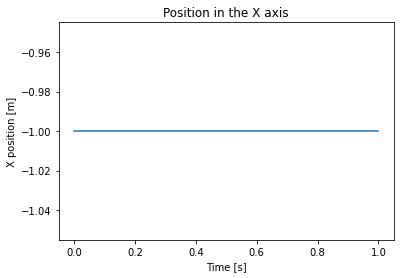

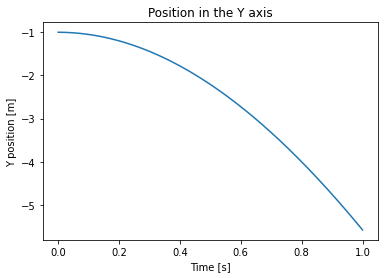

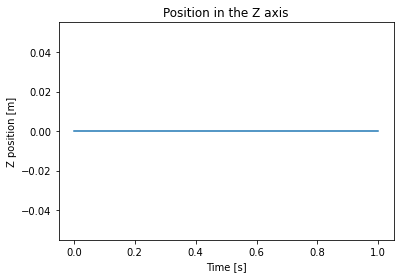

1.0
((-1.0, -5.614083066352249, 0.0), (0.0, 0.0, 0.0, 1.0))


In [30]:
# Intento 2 de Crear el pendulo
# Nos conectamos en modo DIRECT para realizar los cálculos independientemente 
# de la renderización de imágenes 3D
p.connect(p.DIRECT)


# Accedemos a Bullet data files.
p.setAdditionalSearchPath(pybullet_data.getDataPath())
#p.loadURDF("plane.urdf")

p.resetSimulation()

# Establecemos la gravedad de la simulación
p.setGravity( 0, -9.81, 0 )
p.setTimeStep(1./240.) 



# Creamos el objeto físico con movimiento 
ball_shape = p.createCollisionShape(p.GEOM_SPHERE, radius=0.01) # CAMBIAR RADIO
SphereId   = p.createMultiBody( baseMass = 1, 
                                baseCollisionShapeIndex = ball_shape, 
                                basePosition = [-1,-1,0] ) 



# Creamos las listas o contadores para las dimensiones  x,y,z y t
t = 0 # [s] - Tiempo inicial
X_vec = []
Y_vec = []
Z_vec = []
t_vec = []
theta_vec = []

# Creamos la simulación a través de un bucle while 
while t < 1:
    spherePos, sphereOrn = p.getBasePositionAndOrientation(SphereId)
    t_vec.append(t)     
    X_vec.append(spherePos[0])
    Y_vec.append(spherePos[1])
    Z_vec.append(spherePos[2])

    print(spherePos)

    theta_vec.append(spherePos[0]/spherePos[1])

    t += 1./240.  # Actualización de la variable tiempo
    p.stepSimulation() 




# Convertimos las listas de los valores de posición den cada dimensión en un arreglo de matrices en cada una de ellas 
X_vec = np.array(X_vec)
Y_vec = np.array(Y_vec)
Z_vec = np.array(Z_vec)
t_vec = np.array(t_vec)

# Gráfico de la posición de la bola en X,Y,Z
plt.plot(t_vec, X_vec)
plt.xlabel("Time [s]")
plt.ylabel("X position [m]")
plt.title("Position in the X axis")
plt.show()

plt.plot(t_vec, Y_vec)
plt.xlabel("Time [s]")
plt.ylabel("Y position [m]")
plt.title("Position in the Y axis")
plt.show()

plt.plot(t_vec, Z_vec)
plt.xlabel("Time [s]")
plt.ylabel("Z position [m]")
plt.title("Position in the Z axis")
plt.show()

print(theta_vec[0])
Position_Pivot = p.getBasePositionAndOrientation(PivotId)
print(Position_Pivot)
# d_obj = X_vec[-1]-Position_Pivot[0]   +     Y_vec[-1]-Position_Pivot[1]
# print( "Distancia " + str(d_obj) )